In [71]:
# Load libraries
import requests
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from bs4 import BeautifulSoup
import pandas as pd

# Create values Selenium
USERNAME = "username" 
PASSWORD = "password" 
linkedin = 'https://www.linkedin.com/login'

# Open Selenium
browser = webdriver.Chrome('chromedriver.exe')
browser.get(linkedin)
time.sleep(3)
# Identify email and password inputs and enter in information
email = browser.find_element_by_name('session_key')
password = browser.find_element_by_name('session_password')
email.send_keys(USERNAME + Keys.RETURN)
password.send_keys(PASSWORD + Keys.RETURN)
# Go to profile page and scroll to the bottom of the page to load elements of page
time.sleep(3)




In [74]:
#create empty data frame
Exp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
Edu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
Ski_df = pd.DataFrame(columns = ['profile', 'skill'])

# Extract Profile details

In [75]:
fo= open('profiles.txt','r')
for prof in fo.readlines():

    link = prof
    search = link
    browser.get(search)
    time.sleep(2)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')

    #Experience Section  
    titles = page.find_all('div', class_ = "pv-entity__position-group-pager")
    companies = page.find_all('span', class_ = "pv-entity__secondary-title")
    dates = page.find_all('h4', class_ = "pv-entity__date-range")

    #Put scraped data into exp_df

    arraylen1 = len(page.find_all('div', class_ = "pv-entity__position-group-pager"))

    profile = link
    exp_titles = list(map(lambda x: x.h3.text.strip(), titles))[0:arraylen1]
    exp_companies = list(map(lambda x: x.text.strip(), companies))[0:arraylen1]
    exp_dates = list(map(lambda x: x.text.strip().split('\n')[-1], dates))[0:arraylen1]

    #Education Section 
    institution = page.find_all('div', class_ = "pv-entity__degree-info")
    degree = page.find_all('p', class_ = "pv-entity__degree-name")
    dates = page.find_all('p', class_ = "pv-entity__dates")



    #Put scraped data into edu_df

    arraylen2 = len(page.find_all('div', class_ = "pv-entity__degree-info"))

    profile = link
    ed_name = list(map(lambda x: x.text.strip().split('\n')[-1], institution))[0:arraylen2]
    ed_deg = list(map(lambda x: x.text.strip().split('\n')[-1], degree))[0:arraylen2]
    ed_dates = list(map(lambda x: x.text.strip().split('\n')[-1], dates))[0:arraylen2]
    if len(ed_dates) < arraylen2:
        ed_dates = 'NA'
    #Skill Section 
    skill = page.find_all('span', class_ = "pv-skill-category-entity__name-text")

    #Put scraped data into a ski_df

    arraylen3 = len(page.find_all('span', class_ = "pv-skill-category-entity__name-text"))

    profile = link
    skill = list(map(lambda x: x.text.strip(), skill))[0:arraylen3]
    try:
        temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
        temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
        temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
        Exp_df = Exp_df.append(temp1)
        Edu_df = Edu_df.append(temp2)
        Ski_df = Ski_df.append(temp3)
        print(link, 'completed')
    except:
        print(link, 'skipped')



# Reset dataframe index
Exp_df.reset_index()
Edu_df.reset_index()
Ski_df.reset_index()

# Export results
Exp_df.to_csv("output_experience.csv", index = False,sep='\t', encoding='utf-8')
Edu_df.to_csv("output_education.csv", index = False,sep='\t', encoding='utf-8')
Ski_df.to_csv("output_skills.csv", index = False,sep='\t', encoding='utf-8')

# Close Selenium
browser.quit()

https://www.linkedin.com/in/sandeep-pula-9b078b185
 completed
https://www.linkedin.com/in/varun-royal23/
 completed
https://www.linkedin.com/in/imamuddin-gouse-4697a2186/
 completed
https://www.linkedin.com/in/abdul-abbas-3772721a7/
 completed
https://www.linkedin.com/in/ravi-kumar-57533b1ab/
 completed
https://www.linkedin.com/in/syed-sohail-2aa9121aa/
 completed
https://www.linkedin.com/in/sreekanth-reddy-709b091a6/
 completed
https://www.linkedin.com/in/pradeep-kumar-reddy-koppula-081901164/
 completed
https://www.linkedin.com/in/kodadala-lakshmi-97076690/
 completed
https://www.linkedin.com/in/kullay-swamy-dudekula-588070183/
 completed
https://www.linkedin.com/in/ranga-prasad-a11027195/
 completed
https://www.linkedin.com/in/sanjeev-kumar-746409185/
 completed
https://www.linkedin.com/in/dr-muruganantham-balakrishnan-a3453623/
 skipped
https://www.linkedin.com/in/vyshnavi-thallam-1882781a6/
 completed
https://www.linkedin.com/in/dudekula-shahida-banu-a9b1451a3/
 completed
https://

# Analysis Starts

In [76]:
# Load library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [77]:
experience = pd.read_csv("output_experience.csv", sep = '\t')
education = pd.read_csv("output_education.csv", sep = '\t')
skills = pd.read_csv("output_skills.csv", sep = '\t')

In [78]:
#Combining skills, experience, education tables for analysis later

from functools import reduce

frames = [skills, experience, education]
Employees = reduce(lambda  left,right: pd.merge(left,right,on=['profile'],
                                            how='outer'), frames)
Employees

,profile,skill,exp_title,exp_company,exp_dates,ed_name,ed_deg,ed_dates
0,https://www.linkedin.com/in/sandeep-pula-9b078...,Python (Programming Language),Virtual Experience Program Intern at JP Morgan...,Internship,Jul 2020 – Present,cse,Bachelor of Technology - BTech,2017 – 2021
1,https://www.linkedin.com/in/sandeep-pula-9b078...,Python (Programming Language),Engineering Student,Full-time,Jun 2017 – Present,cse,Bachelor of Technology - BTech,2017 – 2021
2,https://www.linkedin.com/in/sandeep-pula-9b078...,Data Structures,Virtual Experience Program Intern at JP Morgan...,Internship,Jul 2020 – Present,cse,Bachelor of Technology - BTech,2017 – 2021
3,https://www.linkedin.com/in/sandeep-pula-9b078...,Data Structures,Engineering Student,Full-time,Jun 2017 – Present,cse,Bachelor of Technology - BTech,2017 – 2021
4,https://www.linkedin.com/in/sandeep-pula-9b078...,oracle database 10g,Virtual Experience Program Intern at JP Morgan...,Internship,Jul 2020 – Present,cse,Bachelor of Technology - BTech,2017 – 2021
5,https://www.linkedin.com/in/sandeep-pula-9b078...,oracle database 10g,Engineering Student,Full-time,Jun 2017 – Present,cse,Bachelor of Technology - BTech,2017 – 2021
6,https://www.linkedin.com/in/varun-royal23/\n,C (Programming Language),NaN,NaN,NaN,Computer Engineering,btech,2017 – 2021
7,https://www.linkedin.com/in/varun-royal23/\n,Database Management System (DBMS),NaN,NaN,NaN,Computer Engineering,btech,2017 – 2021
8,https://www.linkedin.com/in/varun-royal23/\n,Java,NaN,NaN,NaN,Computer Engineering,btech,2017 – 2021
9,https://www.linkedin.com/in/ravi-kumar-57533b1...,Engineering,NaN,NaN,NaN,Computer science and engineering,B.tech,2017 – 2021


# Education Analysis

In [100]:
# Education analysis:
#Creating column to identify degree earned 

edu = education

# Function to identify degree
def degree(x):
    if x.lower().find('intermediate') != -1 or x.lower().find('diploma in German') != -1 or x.lower().find('diploma') != -1 or x.lower().find('mba') != -1:
        return(1)
    if x.lower().find('ssc') != -1 or x.lower().find('p.hd') != -1 or x.lower().find('ph.d.') != -1 or x.lower().find('ph.d') != -1:
        return(2)
    if x.lower().find('bachelor') != -1 or x.lower().find('B.tech') != -1 or x.lower().find('btech') != -1 or x.lower().find('b.a') != -1 or x.lower().find('b.s') != -1:
        return(3)
    else:
        return(0)

    
# Create degree column
edu['deg'] = list(map(degree, edu['ed_deg']))

edu


,profile,ed_name,ed_deg,ed_dates,deg
0,https://www.linkedin.com/in/sandeep-pula-9b078...,cse,Bachelor of Technology - BTech,2017 – 2021,3
1,https://www.linkedin.com/in/varun-royal23/\n,Computer Engineering,btech,2017 – 2021,3
2,https://www.linkedin.com/in/imamuddin-gouse-46...,cse,Bachelor of Technology - BTech,2017 – 2021,3
3,https://www.linkedin.com/in/imamuddin-gouse-46...,98.6%,Intermediate,2015 – 2017,1
4,https://www.linkedin.com/in/imamuddin-gouse-46...,9.3,High school,2002 – 2015,0
5,https://www.linkedin.com/in/abdul-abbas-377272...,Computer Science,Bachelor of Technology - BTech,2017 – 2021,3
6,https://www.linkedin.com/in/ravi-kumar-57533b1...,Computer science and engineering,B.tech,2017 – 2021,0
7,https://www.linkedin.com/in/ravi-kumar-57533b1...,MPC,Intermediate,2015 – 2017,1
8,https://www.linkedin.com/in/ravi-kumar-57533b1...,SSC,Tenth,2014 – 2015,0
9,https://www.linkedin.com/in/syed-sohail-2aa912...,Computer Engineering,Bachelor of Technology - BTech,2017 – 2021,3


# Last degree earned

In [101]:
# last degree earned

#Gathering only the employee's last completed education before employment 

eduF = edu.groupby('profile').first()
eduF

,ed_name,ed_deg,ed_dates,deg
profile,,,,
https://www.linkedin.com/in/abdul-abbas-3772721a7/\n,Computer Science,Bachelor of Technology - BTech,2017 – 2021,3
https://www.linkedin.com/in/dudekula-shahida-banu-a9b1451a3/\n,Computer Software Engineering,Bachelor of Technology - BTech,2017 – 2021,3
https://www.linkedin.com/in/gopal-pujari-182057162/\n,electronics and Communuvational engineering,electronics and Communuvational engineering,NaN,0
https://www.linkedin.com/in/imamuddin-gouse-4697a2186/\n,cse,Bachelor of Technology - BTech,2017 – 2021,3
https://www.linkedin.com/in/kullay-swamy-dudekula-588070183/\n,Mechanical Engineering,Bachelor of Technology - BTech,2018 – 2021,3
https://www.linkedin.com/in/kummetha-ravindra-reddy-383b891a0/\n,computer science and engineering,Bachelor of Technology - BTech,2017 – 2021,3
https://www.linkedin.com/in/likhith-krishna-gowdeti-b40366191/\n,Electronics and Communication Engineerring,Bachelor of Technology - BTech,2017 – 2021,3
https://www.linkedin.com/in/lokeshwar-reddy-6a1937171/\n,"Electrical, Electronics and Communications Eng...",B.tech,2016 – 2020,0
https://www.linkedin.com/in/manepulla-vamsi-86092615b/\n,Computer Science,Bachelor of Technology,2016 – 2020,3


In [102]:
#Looking into the percentages of each last degree earned 

eduF['deg'].value_counts(normalize=True) * 100

3    86.666667
0    10.000000
1     3.333333
Name: deg, dtype: float64

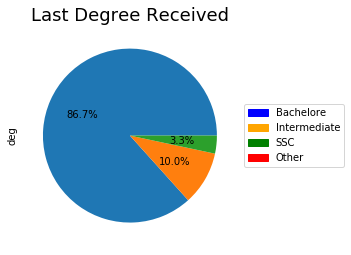

In [116]:

pie = eduF['deg'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie.set_title("Last Degree Received", fontsize=18)
Master = mpatches.Patch(color='blue', label='Bachelore')
PhD = mpatches.Patch(color='orange', label='Intermediate')
Bachelor = mpatches.Patch(color='green', label='SSC')
Other = mpatches.Patch(color='red', label='Other')
plt.legend(handles=[Master,PhD,Bachelor,Other], loc='center left', bbox_to_anchor=(1, 0.5))

In [83]:
edum = edu
edum = edum[edum.deg != 0]
edum = edum[edum.deg != 2]
edum = edum[edum.deg != 3]
edum

,profile,ed_name,ed_deg,ed_dates,deg


# Masters degree or Course

In [84]:
# what master degree types are in the value?
edum['ed_name'].unique()

array([], dtype=object)

In [106]:
# Function to identify Master degree name

def degN(x):
    if x.lower().find('computer') != -1 or x.lower().find('science') or x.lower().find('cse') != -1:
        return(1)
    if x.lower().find('stat') != -1 or x.lower().find('math') != -1 or x.lower().find('phy') != -1:
        return(2)
    if x.lower().find('engin') != -1 or x.lower().find('elect') != -1 or x.lower().find('ee') != -1:
        return(3)
    if x.lower().find('finan') != -1 or x.lower().find('econom') != -1:
        return(4)
    if x.lower().find('mechanical') != -1 or x.lower().find('mech') != -1:
        return(5)
    if x.lower().find('survey') != -1:
        return(6)
    else:
        return(0)

    
# Create degree column
edum['deg_name'] = list(map(degN, edum['ed_name']))

#Took out values = 0 because they are only gpa scores 
edum = edum[edum.deg_name != 0]

edum

,profile,ed_name,ed_deg,ed_dates,deg,deg_name


In [107]:
edum['deg_name'].value_counts(normalize=True) * 100


Series([], Name: deg_name, dtype: float64)

In [108]:

pie7 = edum['deg_name'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie7.set_title("Master Degree Received", fontsize=18)

Engineer = mpatches.Patch(color='blue', label='Engineer')
Math_Stats_Physics = mpatches.Patch(color='orange', label='Math_Stats_Physics')
ComputerScience  = mpatches.Patch(color='green', label='ComputerScience ')
Business_Marketing = mpatches.Patch(color='red', label='Business_Marketing')
Finance_Economics = mpatches.Patch(color='purple', label='Finance_Economics')
SurveyMethodology = mpatches.Patch(color = 'brown', label='SurveyMethodology')

plt.legend(handles=[Engineer,Math_Stats_Physics,ComputerScience,Business_Marketing,Finance_Economics,SurveyMethodology], loc='center left', bbox_to_anchor=(1, 0.5))

TypeError: Empty 'DataFrame': no numeric data to plot

# Bachelor degree

In [109]:
#Remove degrees NOT bachelor 

edub = edu
edub = edub[edub.deg != 0]
edub = edub[edub.deg != 1]
edub = edub[edub.deg != 2]
edub

,profile,ed_name,ed_deg,ed_dates,deg
0,https://www.linkedin.com/in/sandeep-pula-9b078...,cse,Bachelor of Technology - BTech,2017 – 2021,3
1,https://www.linkedin.com/in/varun-royal23/\n,Computer Engineering,btech,2017 – 2021,3
2,https://www.linkedin.com/in/imamuddin-gouse-46...,cse,Bachelor of Technology - BTech,2017 – 2021,3
5,https://www.linkedin.com/in/abdul-abbas-377272...,Computer Science,Bachelor of Technology - BTech,2017 – 2021,3
9,https://www.linkedin.com/in/syed-sohail-2aa912...,Computer Engineering,Bachelor of Technology - BTech,2017 – 2021,3
13,https://www.linkedin.com/in/pradeep-kumar-redd...,Mechanical Engineering,Bachelor of Technology - BTech,2014 – 2018,3
14,https://www.linkedin.com/in/kullay-swamy-dudek...,Mechanical Engineering,Bachelor of Technology - BTech,2018 – 2021,3
16,https://www.linkedin.com/in/ranga-prasad-a1102...,70.5,Bachelor of Technology - BTech,2017 – 2021,3
19,https://www.linkedin.com/in/sanjeev-kumar-7464...,Computer Science,Bachelor of Technology - BTech,2017 – 2021,3
20,https://www.linkedin.com/in/vyshnavi-thallam-1...,Computer Science,Bachelor of Technology - BTech,2017 – 2021,3


In [121]:
# Function to identify Bachelor degree name

def degreeN(x):
    if x.lower().find('computer') != -1 or x.lower().find('science') != -1:
        return(1)
    if x.lower().find('stat') != -1 or x.lower().find('math') != -1 or x.lower().find('phy') != -1:
        return(2)
    if x.lower().find('eng') != -1 or x.lower().find('elect') != -1 or x.lower().find('ee') != -1:
        return(3)
    if x.lower().find('commun') != -1 or x.lower().find('art') != -1 or x.lower().find('econom') != -1:
        return(4)
    if x.lower().find('auto') != -1:
        return(5)
    if x.lower().find('mari') != -1:
        return(6)
    else:
        return(0)

    
# Create degree column
edub['deg_name'] = list(map(degreeN, edub['ed_name']))

#Took out values = 0 because they are only gpa scores 
edub = edub[edub.deg_name != 0]

edub

,profile,ed_name,ed_deg,ed_dates,deg,deg_name
1,https://www.linkedin.com/in/varun-royal23/\n,Computer Engineering,btech,2017 – 2021,3,1
5,https://www.linkedin.com/in/abdul-abbas-377272...,Computer Science,Bachelor of Technology - BTech,2017 – 2021,3,1
9,https://www.linkedin.com/in/syed-sohail-2aa912...,Computer Engineering,Bachelor of Technology - BTech,2017 – 2021,3,1
13,https://www.linkedin.com/in/pradeep-kumar-redd...,Mechanical Engineering,Bachelor of Technology - BTech,2014 – 2018,3,3
14,https://www.linkedin.com/in/kullay-swamy-dudek...,Mechanical Engineering,Bachelor of Technology - BTech,2018 – 2021,3,3
19,https://www.linkedin.com/in/sanjeev-kumar-7464...,Computer Science,Bachelor of Technology - BTech,2017 – 2021,3,1
20,https://www.linkedin.com/in/vyshnavi-thallam-1...,Computer Science,Bachelor of Technology - BTech,2017 – 2021,3,1
21,https://www.linkedin.com/in/dudekula-shahida-b...,Computer Software Engineering,Bachelor of Technology - BTech,2017 – 2021,3,1
22,https://www.linkedin.com/in/suresh-suri-209799...,Computer Engineering,Bachelor of Technology - BTech,2017 – 2021,3,1
23,https://www.linkedin.com/in/veena-pani-ab72731...,Computer Science&engineering,Bachelor of Technology - BTech,2017 – 2021,3,1


In [122]:
edub['deg_name'].value_counts(normalize=True) * 100


1    79.166667
3    20.833333
Name: deg_name, dtype: float64

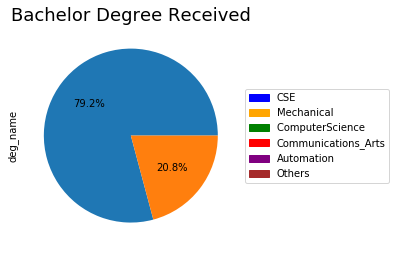

In [125]:
pie2 = edub['deg_name'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie2.set_title("Bachelor Degree Received", fontsize=18)

Math_Stats_Physics = mpatches.Patch(color='blue', label='CSE')
Engineer_Electronics = mpatches.Patch(color='orange', label='Mechanical')
ComputerScience  = mpatches.Patch(color='green', label='ComputerScience ')
Communications_Arts = mpatches.Patch(color='red', label='Communications_Arts')
Automation = mpatches.Patch(color='purple', label='Automation')
Others = mpatches.Patch(color = 'brown', label='Others')

plt.legend(handles=[Math_Stats_Physics,Engineer_Electronics,ComputerScience,Communications_Arts,Automation,Others], loc='center left', bbox_to_anchor=(1, 0.5))

IndexError: list assignment index out of range

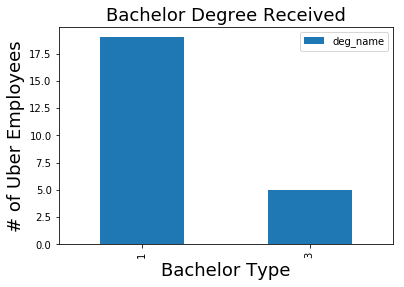

In [126]:
bar = edub['deg_name'].value_counts().plot(kind="bar", legend=True)
bar.set_title("Bachelor Degree Received", fontsize=18)
bar.set_xlabel("Bachelor Type", fontsize=18);
bar.set_ylabel("# of Uber Employees", fontsize=18);
labels = [item.get_text() for item in bar.get_xticklabels()]
labels[0] = 'Math_Stats_Physics'
labels[1] = 'Engineer_Electronics'
labels[2] = 'ComputerScience'
labels[3] = 'Communications_Arts'
labels[4] = 'Automation'
labels[5] = 'Others'

#bar.set_xticklabels(labels)
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

Math_Stats_Physics = mpatches.Patch(color='blue', label='Math_Stats_Physics')
Engineer_Electronics = mpatches.Patch(color='orange', label='Engineer_Electronics')
ComputerScience  = mpatches.Patch(color='green', label='ComputerScience ')
Communications_Arts = mpatches.Patch(color='red', label='Communications_Arts')
Automation = mpatches.Patch(color='purple', label='Automation')
Others = mpatches.Patch(color = 'brown', label='Others')

plt.legend(handles=[Math_Stats_Physics,Engineer_Electronics,ComputerScience,Communications_Arts,Automation,Others], loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    bar.annotate(format(height), (p.get_x()+.18*width, p.get_y() + height + 0.05))

# Coding skills

In [93]:
# best coding lang to know


# what skills are in the value?
ski = skills
ski['skill'].unique()

array(['Python (Programming Language)', 'Data Structures',
       'oracle database 10g', 'C (Programming Language)',
       'Database Management System (DBMS)', 'Java', 'Engineering',
       'German Translation', 'German to English', 'Translation', 'Matlab',
       'Core Java', 'HTML', 'HTML5', 'C++', 'Digital Marketing',
       'Electronics', 'C', 'Python Basic', 'Electronics Hardware Design',
       'Internet of Things (IoT)', 'Django'], dtype=object)

In [94]:
ski2 = ski.loc[ski['skill'].isin(['R','Python', 'SQL', 'C++', 'Java', 'C'])]
ski2
ski2['skill'].value_counts(normalize=True) * 100

Java    71.428571
C       14.285714
C++     14.285714
Name: skill, dtype: float64

IndexError: list assignment index out of range

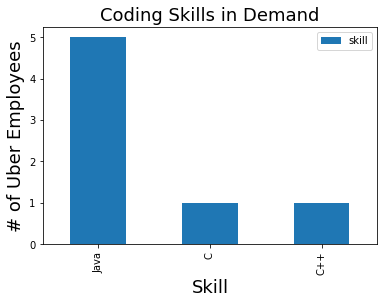

In [95]:
skilbar = ski2['skill'].value_counts().plot(kind="bar", legend=True)
skilbar.set_title("Coding Skills in Demand", fontsize=18)
skilbar.set_xlabel("Skill", fontsize=18);
skilbar.set_ylabel("# of Uber Employees", fontsize=18);
labels = [item.get_text() for item in bar.get_xticklabels()]
labels[0] = 'Python'
labels[1] = 'C++'
labels[2] = 'R'
labels[3] = 'Java'
labels[4] = 'C'
labels[5] = 'SQL'

axx = plt.axes()
x_axis2 = axx.axes.get_xaxis()
x_axis2.set_visible(False)

Python = mpatches.Patch(color='blue', label='Python')
Cplus = mpatches.Patch(color='orange', label='C++')
R = mpatches.Patch(color='green', label='R')
Java = mpatches.Patch(color='red', label='Java')
C = mpatches.Patch(color='purple', label='C')
SQL = mpatches.Patch(color = 'brown', label='SQL')

plt.legend(handles=[Python,Cplus,R,Java,C,SQL], loc='center left', bbox_to_anchor=(1, 0.5))

for g in axx.patches:
    width, height = g.get_width(), g.get_height()
    x, y = g.get_xy() 
    skilbar.annotate(format(height), (g.get_x()+.18*width, g.get_y() + height + 0.05))

# Experience

In [96]:
#Experience Analysis

exp = experience

# Function to identify company uber
def uber(x):
    if x.lower().find('uber') != -1:
        return(1)
    else:
        return(0)

    
# Create uber column
exp['uber'] = list(map(uber, exp['exp_company']))

#Remove value 0
#expU = expU[expU.uber != 0]

exp

,profile,exp_title,exp_company,exp_dates,uber
0,https://www.linkedin.com/in/sandeep-pula-9b078...,Virtual Experience Program Intern at JP Morgan...,Internship,Jul 2020 – Present,0
1,https://www.linkedin.com/in/sandeep-pula-9b078...,Engineering Student,Full-time,Jun 2017 – Present,0


In [97]:
#Creating table to show all companies but Uber

exp = experience

#Remove value 1
expC = exp[exp.uber != 1]
expC

,profile,exp_title,exp_company,exp_dates,uber
0,https://www.linkedin.com/in/sandeep-pula-9b078...,Virtual Experience Program Intern at JP Morgan...,Internship,Jul 2020 – Present,0
1,https://www.linkedin.com/in/sandeep-pula-9b078...,Engineering Student,Full-time,Jun 2017 – Present,0


In [98]:
#Gathering only the employee's last employment before starting at Uber

expCL = expC.groupby('profile').first()
expCL

,exp_title,exp_company,exp_dates,uber
profile,,,,
https://www.linkedin.com/in/sandeep-pula-9b078b185\n,Virtual Experience Program Intern at JP Morgan...,Internship,Jul 2020 – Present,0


In [99]:
##Not useful due to numbers

#Looking at top 10 companies employees worked before Uber 

expCL['exp_company'].value_counts(normalize=False).nlargest(10)

Internship    1
Name: exp_company, dtype: int64